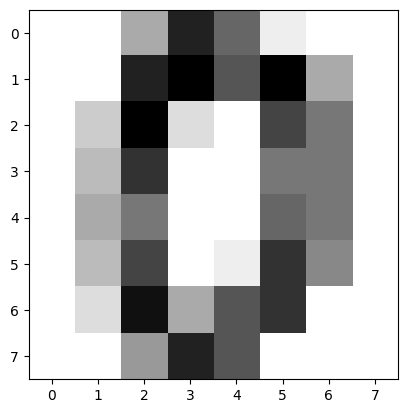

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [20]:
n_samples = len(digits.images)

# Resize images to 28x28
data = tf.image.resize(digits.images[..., tf.newaxis], (28, 28)).numpy()

data = data.reshape((n_samples, 28, 28, 1))

In [22]:
target = digits.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
# X_train = X_train.reshape(-1, 8, 8, 1)
# X_test = X_test.reshape(-1, 8, 8, 1)

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2)


y_pred = model.predict(X_test)

y_test_class = y_test
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 1.0000 - loss: 2.4615e-04 - val_accuracy: 1.0000 - val_loss: 1.9549e-04
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 1.0000 - loss: 1.7128e-04 - val_accuracy: 1.0000 - val_loss: 1.8967e-04
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 1.0000 - loss: 1.9188e-04 - val_accuracy: 1.0000 - val_loss: 1.8143e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 1.5366e-04 - val_accuracy: 1.0000 - val_loss: 1.7834e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 1.3118e-04 - val_accuracy: 1.0000 - val_loss: 1.7682e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 1.3927e-04 - val_accuracy: 1.0000 - val_loss: 1.7502e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 1.0492e-04 - val_accuracy: 1.0000 - val_loss: 1.7201e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - ac

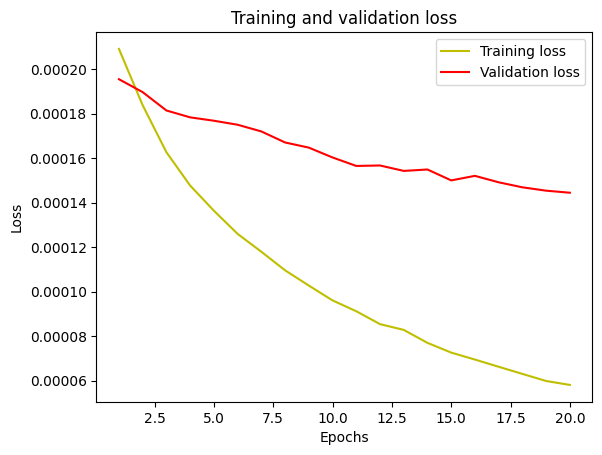

In [32]:
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

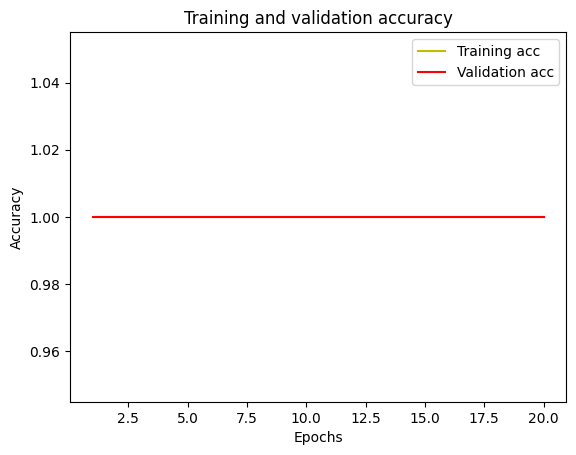

In [33]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        34
           8       0.97      0.97      0.97        30
           9       1.00      0.97      0.99        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0

In [35]:
import tensorflow as tf

# Convert integer labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Re-compile the model with MSE loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=['accuracy'])

# Train the model with one-hot encoded labels
history_mse = model.fit(
    X_train, y_train_one_hot,
    validation_split=0.2,
    epochs=20)

# Evaluate the model (using the original integer labels for metrics)
loss_mse, accuracy_mse = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f'Test loss (MSE): {loss_mse:.4f}')
print(f'Test accuracy (with MSE loss): {accuracy_mse:.4f}')

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9999 - loss: 1.0244e-05 - val_accuracy: 0.9757 - val_loss: 0.0041
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9824 - loss: 0.0023 - val_accuracy: 0.9688 - val_loss: 0.0044
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9792 - loss: 0.0030 - val_accuracy: 0.9896 - val_loss: 0.0020
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9973 - loss: 5.0661e-04 - val_accuracy: 0.9896 - val_loss: 0.0013
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9970 - loss: 4.2239e-04 - val_accuracy: 0.9722 - val_loss: 0.0038
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9846 - loss: 0.0023 - val_accuracy: 0.9826 - val_loss: 0.0018
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9884 - loss: 0.0016 - val_accuracy: 0.9965 - val_loss: 5.4979e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9958 - loss: 7.7898e-04 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


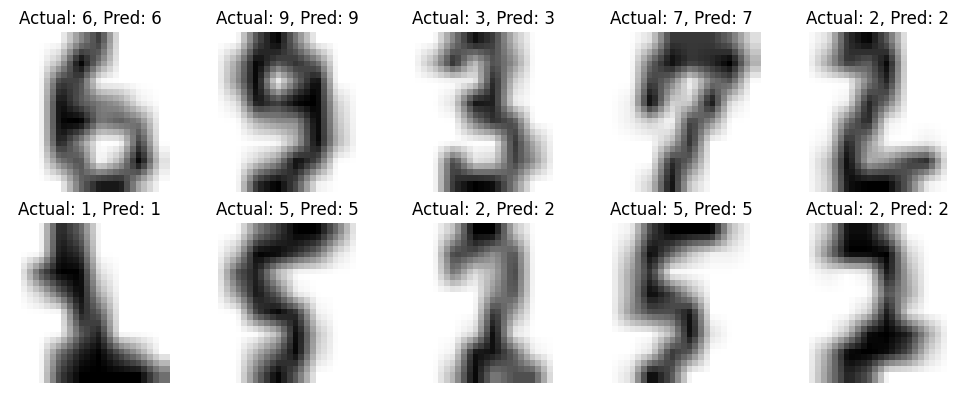

In [37]:
import numpy as np

predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    color = 'black' if predicted_classes[i] == y_test[i] else 'red'
    plt.title(f'Actual: {y_test[i]}, Pred: {predicted_classes[i]}', color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


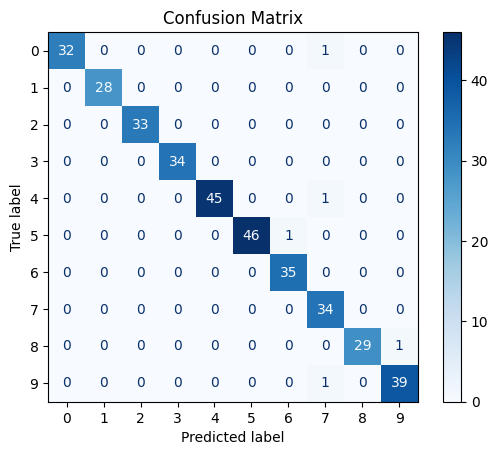

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the entire test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()